In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
dataset=data
dataset

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [5]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

In [12]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[62,  6],
       [ 3, 29]])

In [14]:
from sklearn import metrics
prediction=metrics.accuracy_score(y_test,y_pred)
print("Accuracy",prediction*100,'%')


Accuracy 91.0 %


[Text(0.4967948717948718, 0.9615384615384616, 'x[0] <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(0.26282051282051283, 0.8846153846153846, 'x[1] <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(0.11538461538461539, 0.8076923076923077, 'x[0] <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(0.08974358974358974, 0.7307692307692307, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.14102564102564102, 0.7307692307692307, 'x[1] <= -0.06\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(0.11538461538461539, 0.6538461538461539, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.16666666666666666, 0.6538461538461539, 'x[1] <= 0.403\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(0.14102564102564102, 0.5769230769230769, 'x[1] <= 0.027\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(0.11538461538461539, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.5, 'x[1] <=

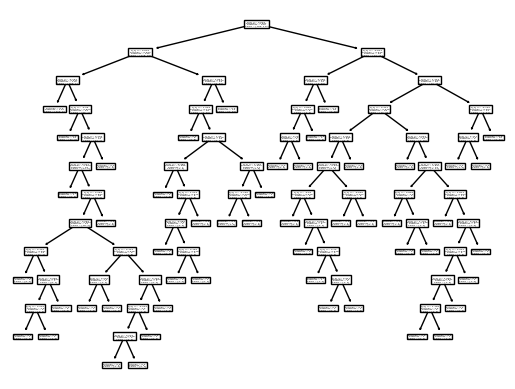

In [15]:
from sklearn import tree
tree.plot_tree(classifier)


<ipython-input-16-f934d268b40a>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


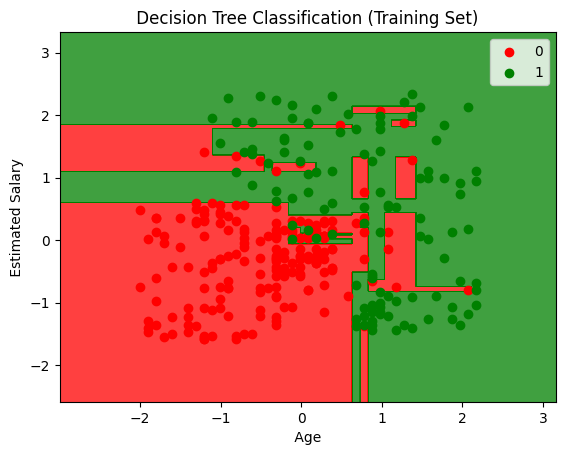

In [16]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

plt.title(" Decision Tree Classification (Training Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

<ipython-input-17-94de9408b334>:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


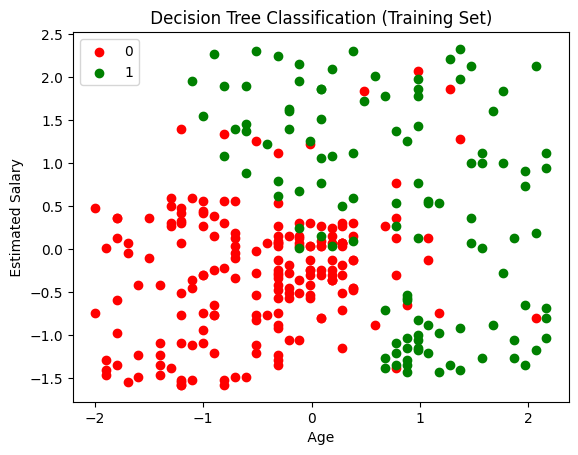

In [17]:
for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

plt.title(" Decision Tree Classification (Training Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

<ipython-input-18-b9e28aee66dc>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


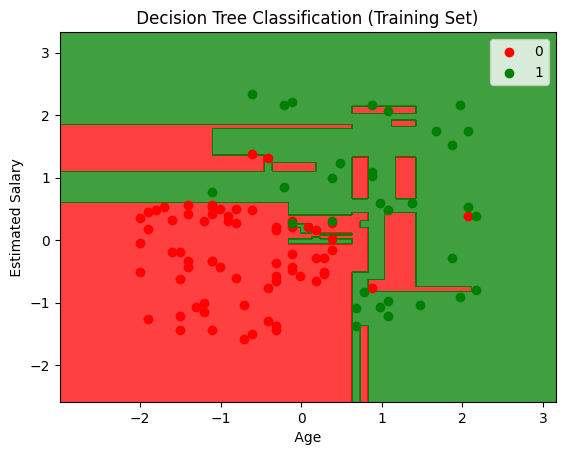

In [18]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

plt.title(" Decision Tree Classification (Training Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()